In [1]:
import os
import numpy as np
import librosa

def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

# Replace with the path to your dataset
dataset_path = 'C:\Capstone details\Ravdess'

mfcc_features = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.wav'):
            try:
                file_path = os.path.join(root, file)
                mfccs = extract_mfcc(file_path)
                file_class = int(file[7:8])  # Extracting class from the file name
                mfcc_features.append((mfccs, file_class))
            except ValueError as err:
                print(f"Error processing file {file}: {err}")
                continue

# Check if the extraction worked
print(f"Extracted {len(mfcc_features)} files")
for i in range(5):  # Print the first 5 entries
    print(mfcc_features[i])


Extracted 2880 files
(array([-7.0004803e+02,  5.8141853e+01, -2.5586064e+00,  1.5606679e+01,
        4.6350527e+00,  3.5391414e+00, -6.1175652e+00, -3.8244814e-01,
       -1.3615901e+01, -3.6257145e-01, -1.5083561e+00, -8.8440013e-01,
       -1.9431375e-02, -1.9431809e+00, -1.1695703e+00,  2.2041264e+00,
       -5.3086200e+00, -8.0527282e-01, -2.2019832e+00, -2.1287867e-01,
       -6.4919910e+00, -1.1663349e-01, -2.5802991e+00, -4.4166455e+00,
       -1.6603626e+00, -9.5398951e-01, -4.6195726e+00, -7.7804245e-02,
       -1.7321769e+00, -3.4443223e-01, -1.4828780e+00, -2.7266295e+00,
       -2.0602062e+00, -2.5263202e+00, -2.4850087e+00, -2.2882392e+00,
       -3.3125418e-01, -2.5409374e+00, -2.7235920e+00, -2.3176184e+00],
      dtype=float32), 1)
(array([-6.9518512e+02,  5.8720722e+01, -4.8757939e+00,  1.9315144e+01,
        5.6119609e+00,  2.9712064e+00, -4.3853626e+00, -2.4032483e+00,
       -1.4377567e+01,  1.2576108e+00, -1.6031673e+00, -3.6167070e-01,
       -1.0886658e+00, -1.34

In [1]:
import joblib

# Unzipping the list and converting to NumPy arrays
x, y = zip(*mfcc_features)
x, y = np.asarray(x), np.asarray(y)
print(x.shape, y.shape)

# Define the directory path to save the arrays
SAVE_DIR_PATH = 'C:\Capstone details\Ravdess_MFCC_Features'  # Replace with your directory path

# Check if the directory exists, if not, create it
if not os.path.isdir(SAVE_DIR_PATH):
    os.makedirs(SAVE_DIR_PATH)

# Save the arrays to files using joblib
joblib.dump(x, os.path.join(SAVE_DIR_PATH, 'x.joblib'))
joblib.dump(y, os.path.join(SAVE_DIR_PATH, 'y.joblib'))


NameError: name 'mfcc_features' is not defined

In [3]:
import joblib
import os

# Define the directory path to load the arrays
LOAD_DIR_PATH = 'C:\\Capstone details\\Ravdess_MFCC_Features'  # Replace with your directory path

# Load the arrays from files using joblib
x = joblib.load(os.path.join(LOAD_DIR_PATH, 'x.joblib'))
y = joblib.load(os.path.join(LOAD_DIR_PATH, 'y.joblib'))

print(f"Loaded MFCC features shape: {x.shape}")
print(f"Loaded labels shape: {y.shape}")


Loaded MFCC features shape: (2880, 40)
Loaded labels shape: (2880,)


In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Straightforward CNN with 1 hidden layer to keep things simple. 
# The last fully connected layer has 8 units, corresponding to the number of output classes (8 emotions).

model = Sequential()

model.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        20,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,872 (81.53 KB)

 Trainable params: 20,872 (81.53 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

print(x_traincnn.shape, x_testcnn.shape)

ValueError: Found input variables with inconsistent numbers of samples: [2880, 66150]

In [ ]:
print(y.shape)

(2880,)


In [11]:
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report

# Adjust labels to zero-based indexing
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Compile the model with sparse_categorical_crossentropy
model.compile(optimizer=RMSprop(),  # Using RMSProp optimizer
              loss='sparse_categorical_crossentropy',  # Use this for integer-encoded labels
              metrics=['accuracy'])  # Metric to track during training

# Fit the model
history = model.fit(x_traincnn, 
                    y_train_adjusted,  # Use adjusted labels
                    epochs=70, 
                    batch_size=32,  # You can adjust the batch size
                    validation_split=0.2,  # Using 20% of training data for validation
                    verbose=1)  # Verbose mode for training progress

# Evaluate the model
loss, accuracy = model.evaluate(x_testcnn, y_test_adjusted, verbose=1)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred = model.predict(x_testcnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert predictions and true labels back to original 1-based indexing
y_pred_classes_original = y_pred_classes + 1
y_test_original = y_test_adjusted + 1

# Generate classification report and confusion matrix
print(confusion_matrix(y_test_original, y_pred_classes_original))
print(classification_report(y_test_original, y_pred_classes_original))


Epoch 1/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7886 - loss: 0.6098 - val_accuracy: 0.6609 - val_loss: 1.1198
Epoch 2/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 0.4711 - val_accuracy: 0.7129 - val_loss: 1.0051
Epoch 3/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.4962 - val_accuracy: 0.7203 - val_loss: 0.9756
Epoch 4/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.4635 - val_accuracy: 0.7376 - val_loss: 0.9265
Epoch 5/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.4862 - val_accuracy: 0.6609 - val_loss: 1.1130
Epoch 6/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.4933 - val_accuracy: 0.6832 - val_loss: 1.0926
Epoch 7/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4996 - val_accuracy: 0.7525 - val_loss: 0.9373
Epoch 8/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.4240 - val_accuracy: 0.7153 - val_loss:

In [18]:
val_accuracy = history.history['val_accuracy']
print(val_accuracy[-1])

0.7599009871482849


In [13]:
from tensorflow.keras.models import load_model

# Save the model
model.save('ser_model.h5')

# Load the model
loaded_model = load_model('ser_model.h5')


In [14]:
import os
import numpy as np
import librosa
from IPython.display import Audio

def extract_mfcc(file_path, sr=22050, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean


audio_file_path = 'C:/Capstone details/audio_for_testing/5.wav'
Audio(audio_file_path)
# Extract MFCC features
mfcc_features = extract_mfcc(audio_file_path)

# Reshape to match the input shape of the CNN model
mfcc_features_reshaped = np.expand_dims(mfcc_features, axis=0)
mfcc_features_reshaped = np.expand_dims(mfcc_features_reshaped, axis=2)

print(mfcc_features_reshaped.shape) 

(1, 40, 1)


In [15]:
prediction = loaded_model.predict(mfcc_features_reshaped)
print(prediction)

# Get the predicted class (emotion)
predicted_class = np.argmax(prediction, axis=1)


# Since the model was trained with 1-based indexing, adjust if necessary
predicted_emotion = predicted_class[0] + 1  # Add 1 if your labels are 1-based

print(f'Predicted emotion class: {predicted_emotion}')
# Example mapping
emotion_labels = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}

print(f'Predicted emotion: {emotion_labels[predicted_emotion]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[6.8144274e-10 6.8833781e-03 2.3782101e-07 1.2604755e-07 5.3801323e-06
  9.8987645e-01 3.2339799e-03 4.6602989e-07]]
Predicted emotion class: 6
Predicted emotion: fearful


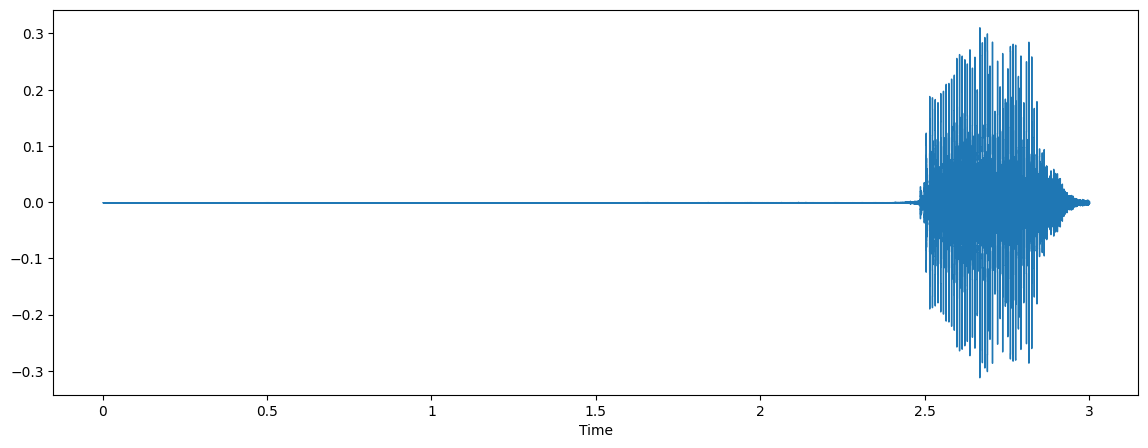

In [16]:
import matplotlib.pyplot as plt
y, sr = librosa.load(audio_file_path, sr=22050)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=22050)
plt.show()

2nd model

In [1]:
import os
from glob import glob
import pickle
import itertools
import matplotlib.pyplot as plt
from PIL import Image
import IPython
from IPython.display import Audio
import pandas as pd

import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import librosa


In [2]:
# RAVDESS Database #ignore CALM
label_dict_ravdess = {'02': 'NEU', '03': 'HAP', '04': 'SAD', '05': 'ANG', '06': 'FEA', '07': 'DIS', '08': 'SUR'}

def set_label_ravdess(audio_file, gender):
    label = label_dict_ravdess.get(audio_file[6:8])
    if gender == True:
        if int(audio_file[18:20]) % 2 == 0:
            label = 'f_' + label
        if int(audio_file[18:20]) % 2 == 1:
            label = 'm_' + label
    return label


In [5]:
import os
import librosa
import numpy as np
from scipy.stats import zscore

# Define the file path for the dataset
file_path = r'C:\Capstone details\Ravdess'

# List all actor folders
file_names = os.listdir(file_path)

# Initialize lists to store signals and labels
signal = []
labels = []

# Parameters
sample_rate = 16000  # Set desired sample rate
max_pad_len = 49100  # Padding length (3 seconds of audio)

# Make sure to define label_dict_ravdess and set_label_ravdess beforehand
# label_dict_ravdess = {'01': 'neutral', '02': 'calm', ... }

# Loop through all actor folders and audio files
for actor_folder in file_names:
    actor_path = os.path.join(file_path, actor_folder)
    
    if os.path.isdir(actor_path):  # Ensure the path is a directory
        for audio_index, audio_file in enumerate(os.listdir(actor_path)):
            if audio_file[6:8] in list(label_dict_ravdess.keys()):
                # Load the audio file using audioread as the backend
                try:
                    # Load the audio file with librosa, using the audioread backend
                    y, sr = librosa.load(os.path.join(actor_path, audio_file), sr=sample_rate, offset=0.5, res_type='kaiser_best')

                    # Normalize the audio signal using z-score normalization
                    y = zscore(y)

                    # Padding or trimming the signal
                    if len(y) < max_pad_len:
                        y_padded = np.zeros(max_pad_len)
                        y_padded[:len(y)] = y
                        y = y_padded
                    elif len(y) > max_pad_len:
                        y = np.asarray(y[:max_pad_len])

                    # Append the processed audio signal and corresponding label
                    signal.append(y)
                    labels.append(set_label_ravdess(audio_file, False))

                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

# Convert the labels list into a numpy array
labels = np.asarray(labels).ravel()

# Output the total number of audio files imported
print(f"Number of audio files imported: {labels.shape[0]}")


Error processing Actor_02: [Errno 13] Permission denied: 'C:\\Capstone details\\Ravdess\\audio_speech_actors_01-24\\Actor_02'
Error processing Actor_03: [Errno 13] Permission denied: 'C:\\Capstone details\\Ravdess\\audio_speech_actors_01-24\\Actor_03'
Error processing Actor_04: [Errno 13] Permission denied: 'C:\\Capstone details\\Ravdess\\audio_speech_actors_01-24\\Actor_04'
Error processing Actor_05: [Errno 13] Permission denied: 'C:\\Capstone details\\Ravdess\\audio_speech_actors_01-24\\Actor_05'
Error processing Actor_06: [Errno 13] Permission denied: 'C:\\Capstone details\\Ravdess\\audio_speech_actors_01-24\\Actor_06'
Error processing Actor_07: [Errno 13] Permission denied: 'C:\\Capstone details\\Ravdess\\audio_speech_actors_01-24\\Actor_07'
Error processing Actor_08: [Errno 13] Permission denied: 'C:\\Capstone details\\Ravdess\\audio_speech_actors_01-24\\Actor_08'
Number of audio files imported: 1344


C:\Users\Aditya Vishwanatha\AppData\Local\Temp\ipykernel_18240\1318045211.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(os.path.join(actor_path, audio_file), sr=sample_rate, offset=0.5, res_type='kaiser_best')
c:\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


TypeError: 'float' object is not subscriptable

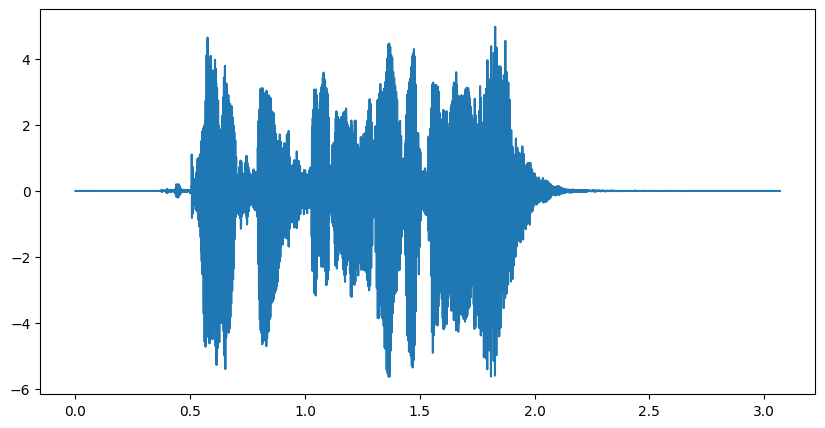

In [6]:
# Select one random audio file
random_idx = np.random.randint(len(labels))
random_label = labels[random_idx]
random_signal = signal[random_idx]

# Plot signal wave
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(random_signal))/float(sample_rate), random_signal)
plt.xlim(np.arange(len(random_signal))/float(sample_rate)[0], (np.arange(len(random_signal))/float(sample_rate))[-1])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (dB)', fontsize=16)
plt.title(f"Signal wave of file with label {random_label}")
plt.show()

# Play audio file
print(f"Audio file '{random_label}':")
Audio(random_signal, rate=sample_rate)

In [8]:
# Number of augmented data
nb_augmented = 2

# Function to add noise to a signal with a desired Signal Noise ratio (SNR)
def noisy_signal(signal, snr_low=15, snr_high=30, nb_augmented=2):

    signal_len = len(signal)
    noise = np.random.normal(size=(nb_augmented, signal_len))

    # Compute signal and noise power
    s_power = np.sum((signal / (2.0 ** 15)) ** 2) / signal_len
    n_power = np.sum((noise / (2.0 ** 15)) ** 2, axis=1) / signal_len
    snr = np.random.randint(snr_low, snr_high)

    # Compute K coeff for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- snr / 10))
    K = np.ones((signal_len, nb_augmented)) * K

    return signal + K.T * noise

augmented_signal = list(map(noisy_signal, signal))

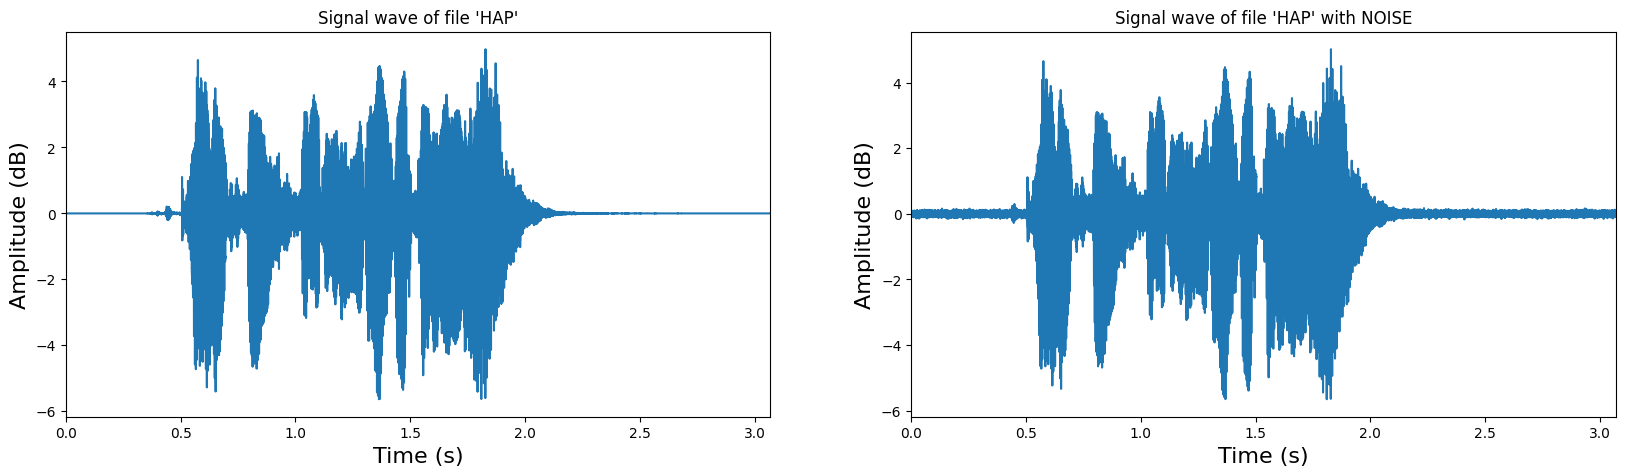

Audio file 'HAP':


Audio file 'HAP' with noise:


In [9]:
# Plot signal wave
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot((np.arange(len(random_signal))/float(sample_rate)), random_signal)
plt.xlim((np.arange(len(random_signal))/float(sample_rate))[0], (np.arange(len(random_signal))/float(sample_rate))[-1])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (dB)', fontsize=16)
plt.title(f"Signal wave of file '{random_label}'")

# Plot signal wave with noise
plt.subplot(1,2,2)
plt.plot((np.arange(len(random_signal))/float(sample_rate)), augmented_signal[random_idx][0])
plt.xlim((np.arange(len(random_signal))/float(sample_rate))[0], (np.arange(len(random_signal))/float(sample_rate))[-1])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (dB)', fontsize=16)
plt.title(f"Signal wave of file '{random_label}' with NOISE")
plt.show()

# Play audio file
print(f"Audio file '{random_label}':")
IPython.display.display(Audio(random_signal, rate=sample_rate))

# Play same audio file with noise
print(f"Audio file '{random_label}' with noise:")
IPython.display.display(Audio(augmented_signal[random_idx][0], rate=sample_rate))

In [10]:
def mel_spectrogram(y, sr=16000, n_fft=512, win_length=256,
                    hop_length=128, window='hamming', n_mels=128, fmax=4000):
    
    # Compute Mel spectrogram
    mel_feat = np.abs(librosa.stft(y, n_fft=n_fft, window=window,
                                   win_length=win_length, hop_length=hop_length)) ** 2
    
    mel_feat = librosa.feature.melspectrogram(S=mel_feat, sr=sr, n_mels=n_mels, fmax=fmax)
    
    mel_feat = librosa.power_to_db(mel_feat, ref=np.max)
    
    return mel_feat

#add noise to the audio signals in "signal"
augmented_signal = list(map(noisy_signal, signal))

# get the Mel spectogram for all the audio
mel_spect = np.asarray(list(map(mel_spectrogram, signal)))
noisy_mel_spect = [np.asarray(list(map(mel_spectrogram, augmented_signal[i])))
                   for i in range(len(augmented_signal))]

In [11]:
#Train test split for both datasets and combine them into one augmented set
org_mel_spec_train, org_mel_spec_test, noisy_mel_spec_train, noisy_mel_spec_test, label_train, label_test = \
train_test_split(mel_spect, noisy_mel_spect, labels, test_size=0.2)

aug_label_train = np.asarray(list(itertools.chain.from_iterable([[label] * nb_augmented for label in label_train])))
noisy_mel_spec_train = np.asarray(list(itertools.chain.from_iterable(noisy_mel_spec_train)))

X_train = np.concatenate((org_mel_spec_train, noisy_mel_spec_train))
y_train = np.concatenate((label_train, aug_label_train))

X_test = org_mel_spec_test
y_test = label_test

# Delete
del org_mel_spec_train, noisy_mel_spec_train, label_train, aug_label_train, noisy_mel_spec_test, org_mel_spec_test, label_test
del mel_spect, noisy_mel_spect, labels

In [12]:
# Create Time distributed data for LSTM
window_size = 128
gap = 64

def frame(x, step_size, window):
    n_frames = 1 + int((x.shape[2] - window) / step_size)
    frames = np.zeros((x.shape[0], n_frames, x.shape[1], window)).astype(np.float32)
    for t in range(n_frames):
        frames[:,t,:,:] = np.copy(x[:, :, (t*step_size):(t*step_size + window)]).astype(np.float32)
    return frames

X_train = frame(X_train, gap, window_size)
X_test = frame(X_test, gap, window_size)

In [13]:
import os

# Ensure directory exists
os.makedirs('C:/Capstone details/multimodal_data/', exist_ok=True)

# Then proceed with your pickle.dump() calls

In [14]:
# Save Train and test set
pickle.dump(X_train.astype(np.float16), open('C:/Capstone details/multimodal_data/[RAVDESS][MEL_SPECT][X_train].p', 'wb'))
pickle.dump(y_train, open('C:/Capstone details//multimodal_data/[RAVDESS][MEL_SPECT][y_train].p', 'wb'))
pickle.dump(X_test.astype(np.float16), open('C:/Capstone details//multimodal_data/[RAVDESS][MEL_SPECT][X_test].p', 'wb'))
pickle.dump(y_test, open('C:/Capstone details//multimodal_data/[RAVDESS][MEL_SPECT][y_test].p', 'wb'))

In [15]:
import os
from glob import glob
import pickle
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import LSTM, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

In [16]:
X_train = pickle.load(open('C:/Capstone details/multimodal_data/[RAVDESS][MEL_SPECT][X_train].p', 'rb'))
y_train = pickle.load(open('C:/Capstone details/multimodal_data/[RAVDESS][MEL_SPECT][y_train].p', 'rb'))
y_test = pickle.load(open('C:/Capstone details/multimodal_data/[RAVDESS][MEL_SPECT][y_test].p', 'rb'))
X_test = pickle.load(open('C:/Capstone details/multimodal_data/[RAVDESS][MEL_SPECT][X_test].p', 'rb'))

In [17]:
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(np.ravel(y_train)))
y_test = to_categorical(lb.transform(np.ravel(y_test)))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], 1)

In [18]:
input_y = Input(shape=X_train.shape[1:], name='Input')

# CNN 64
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'),
                    name='Conv_1')(input_y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_1')(y)
y = TimeDistributed(Activation('elu'), name='Activ_1')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
                    name='MaxPool_1')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_1')(y)

In [19]:
# CNN 64
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'),
                    name='Conv_2')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_2')(y)
y = TimeDistributed(Activation('elu'), name='Activ_2')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'),
                    name='MaxPool_2')(y)
y = TimeDistributed(Dropout(0.1), name='Drop_2')(y)

# CNN 128
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'),
                    name='Conv_3')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_3')(y)
y = TimeDistributed(Activation('elu'), name='Activ_3')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'),
                    name='MaxPool_3')(y)
y = TimeDistributed(Dropout(0.1), name='Drop_3')(y)

## Second CNN 128
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'),
                    name='Conv_4')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_4')(y)
y = TimeDistributed(Activation('elu'), name='Activ_4')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'),
                    name='MaxPool_4')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_4')(y)

In [20]:
# Flatten
y = TimeDistributed(Flatten(), name='Flat')(y)

# LSTM part
y = LSTM(256, return_sequences=False, dropout=0.2, name='LSTM_1')(y)
y = Dense(y_train.shape[1], activation='softmax', name='FC')(y)

In [21]:
model = Model(inputs=input_y, outputs=y)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 5, 128, 128, 1) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_1 (TimeDistributed)        │ (None, 5, 128, 128,    │           640 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_1 (TimeDistributed)   │ (None, 5, 128, 128,    │           256 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activ_1 (TimeDistributed)       │ (None, 5, 128, 128,    │             0 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_1 (TimeDistributed)     │ (None, 5, 64, 64, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_1 (TimeDistributed)        │ (None, 5, 64, 64, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (TimeDistributed)        │ (None, 5, 64, 64, 64)  │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_2 (TimeDistributed)   │ (None, 5, 64, 64, 64)  │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activ_2 (TimeDistributed)       │ (None, 5, 64, 64, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_2 (TimeDistributed)     │ (None, 5, 16, 16, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_2 (TimeDistributed)        │ (None, 5, 16, 16, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (TimeDistributed)        │ (None, 5, 16, 16, 128) │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_3 (TimeDistributed)   │ (None, 5, 16, 16, 128) │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activ_3 (TimeDistributed)       │ (None, 5, 16, 16, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_3 (TimeDistributed)     │ (None, 5, 4, 4, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_3 (TimeDistributed)        │ (None, 5, 4, 4, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_4 (TimeDistributed)        │ (None, 5, 4, 4, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_4 (TimeDistributed)   │ (None, 5, 4, 4, 128)   │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activ_4 (TimeDistributed)       │ (None, 5, 4, 4, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_4 (TimeDistributed)     │ (None, 5, 1, 1, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_4 (TimeDistributed)        │ (None, 5, 1, 1, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flat (TimeDistributed)          │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_1 (LSTM)                   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 656,583 (2.50 MB)

 Trainable params: 655,815 (2.50 MB)

 Non-trainable params: 768 (3.00 KB)

In [25]:
from tensorflow.keras.optimizers import schedules

# Define decay schedule to approximate reaching 1e-6
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100000,  # Number of steps to decay
    decay_rate=0.99,  # Adjust this value based on decay behavior
    staircase=True
)

model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),
              loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='max')

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

MemoryError: Unable to allocate 1008. MiB for an array with shape (3225, 5, 128, 128, 1) and data type float32